# HEART DISEASE ANALYSIS AND PREDICTION USING MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Columns description

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


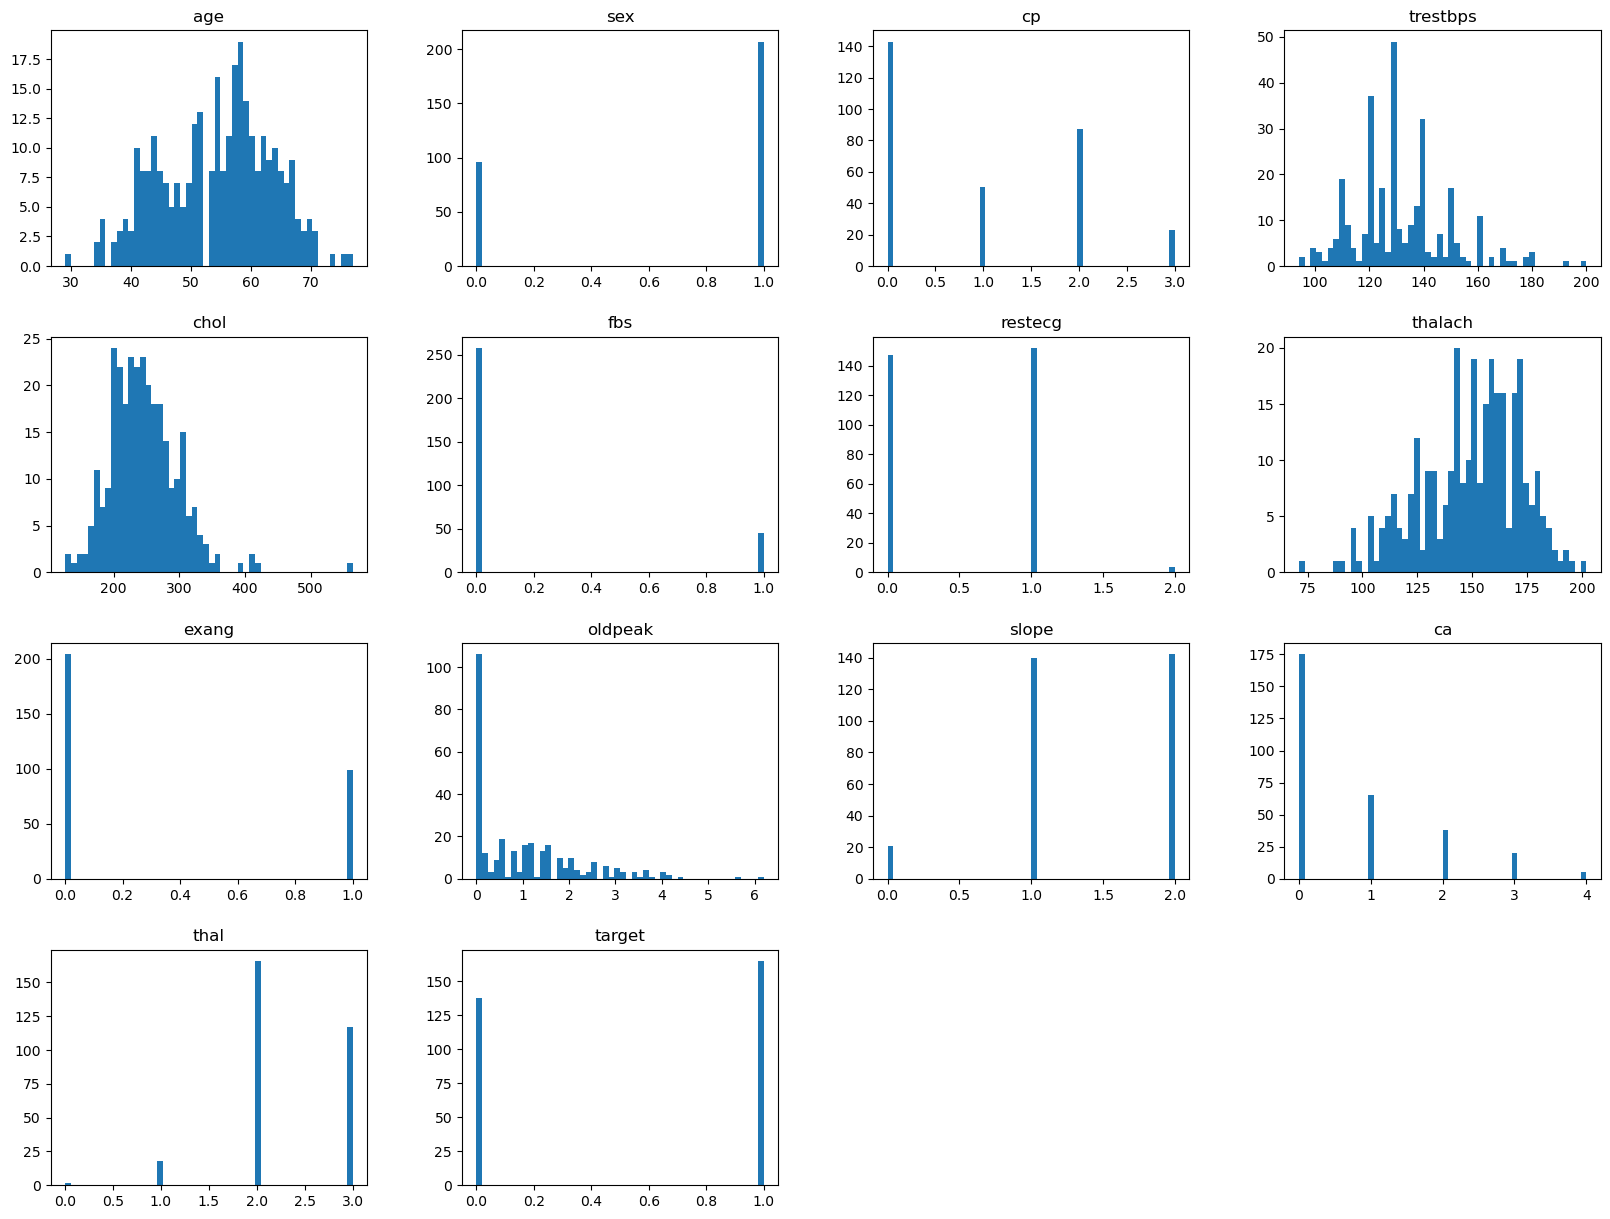

In [7]:
df.hist(bins = 50, grid = False, figsize = (20,15));

## Data Analysis

In [8]:
question = ["1. How many people have heart disease and how many people doesn't have heart disease?",
            "2. People of which sex has most heart disease?",
            "3. People of which sex has which type of chest pain most?",
            "4. Age vs maximum heart rate when people have heart disease?",
            "5. People of which sex has more exercise induced angina?"
         ]

In [9]:
question

["1. How many people have heart disease and how many people doesn't have heart disease?",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. Age vs maximum heart rate when people have heart disease?',
 '5. People of which sex has more exercise induced angina?']

## Finding answer of 1st question 

In [10]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

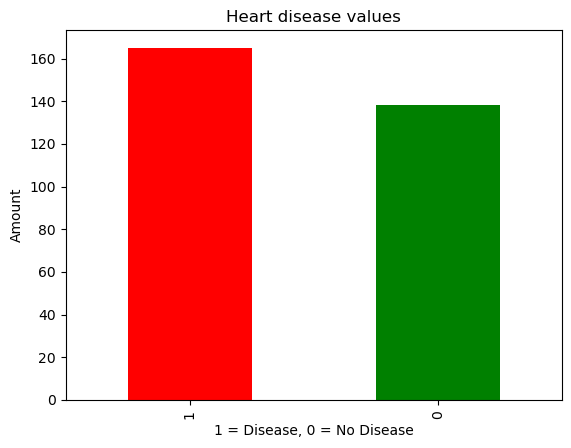

In [11]:
df.target.value_counts().plot(kind = 'bar', color = ['red','green'])
plt.title("Heart disease values")
plt.xlabel("1 = Disease, 0 = No Disease")
plt.ylabel("Amount");

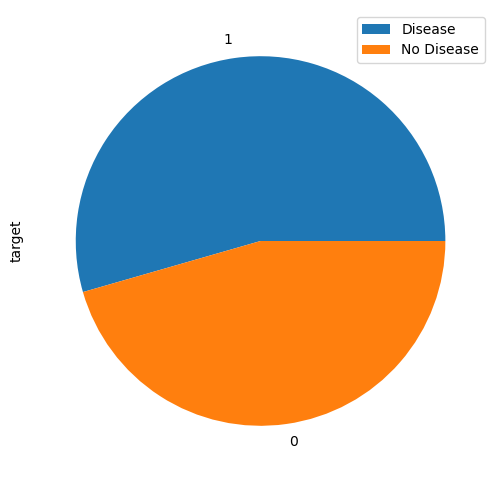

In [12]:
df.target.value_counts().plot(kind = 'pie', figsize = (8,6))
plt.legend(["Disease","No Disease"]);

## Finding answer of 2nd question

In [13]:
question

["1. How many people have heart disease and how many people doesn't have heart disease?",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. Age vs maximum heart rate when people have heart disease?',
 '5. People of which sex has more exercise induced angina?']

In [14]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

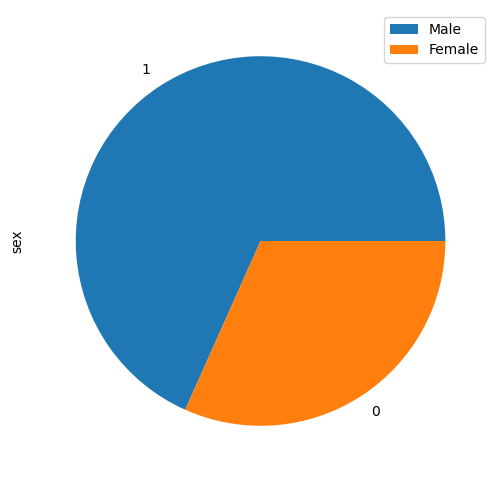

In [15]:
df.sex.value_counts().plot(kind = 'pie', figsize = (8,6))
plt.legend(['Male','Female']);

In [16]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


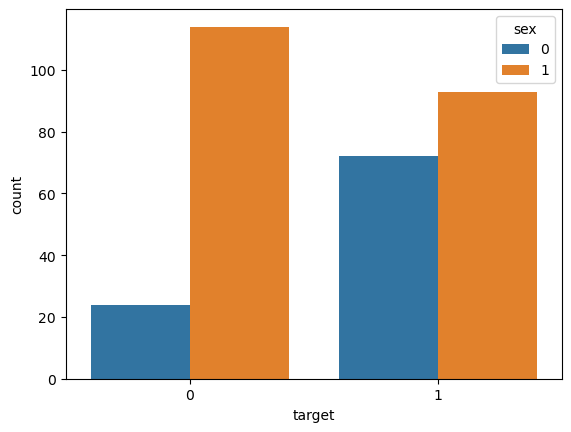

In [17]:
sns.countplot(x='target', data=df, hue='sex');

## Finding answer of question 3

In [18]:
question

["1. How many people have heart disease and how many people doesn't have heart disease?",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. Age vs maximum heart rate when people have heart disease?',
 '5. People of which sex has more exercise induced angina?']

In [19]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

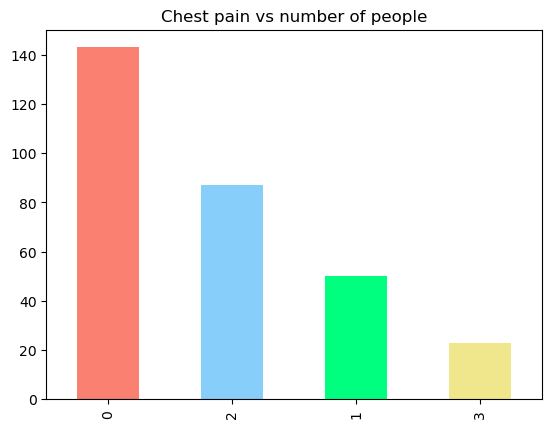

In [20]:
df.cp.value_counts().plot(kind='bar',color=['salmon','lightskyblue','springgreen','khaki'])
plt.title("Chest pain vs number of people");

In [21]:
pd.crosstab(df.sex, df.cp)

cp,0,1,2,3
sex,,,,
0,39,18,35,4
1,104,32,52,19


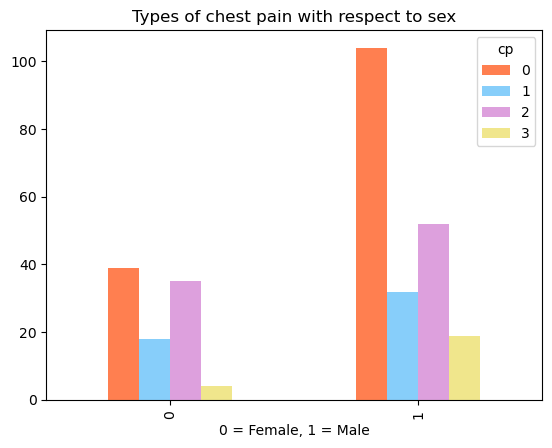

In [22]:
pd.crosstab(df.sex, df.cp).plot(kind='bar',color=['coral','lightskyblue','plum','khaki'])
plt.title("Types of chest pain with respect to sex")
plt.xlabel("0 = Female, 1 = Male");

## Finding answer of question no 4

In [23]:
question

["1. How many people have heart disease and how many people doesn't have heart disease?",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. Age vs maximum heart rate when people have heart disease?',
 '5. People of which sex has more exercise induced angina?']

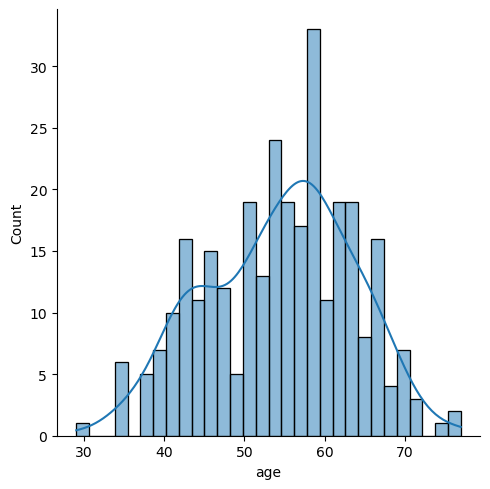

In [24]:
sns.displot(x='age', data=df,bins=30, kde=True);

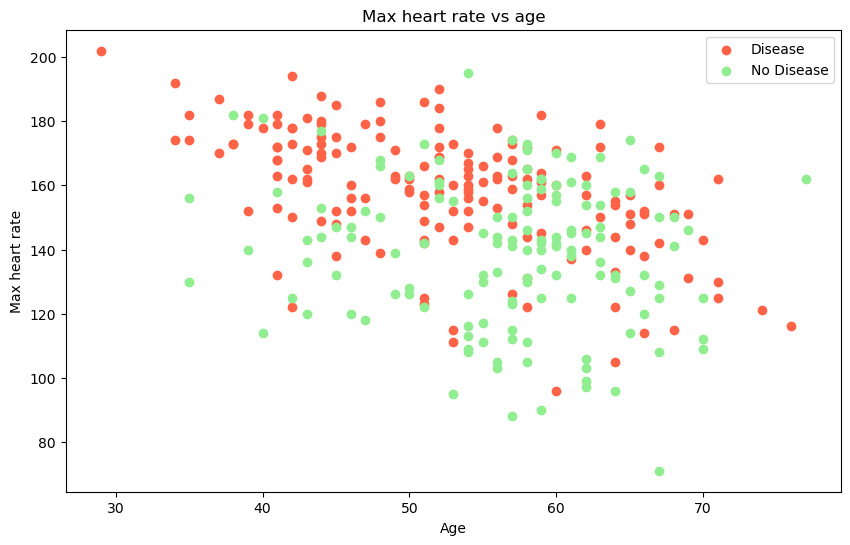

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target==1],
           c = 'tomato')

plt.scatter(df.age[df.target == 0],
           df.thalach[df.target==0],
           c = 'lightgreen')

plt.title("Max heart rate vs age")
plt.xlabel('Age')
plt.ylabel('Max heart rate');
plt.legend(['Disease','No Disease']);

## Finding answer of question 5

In [26]:
question

["1. How many people have heart disease and how many people doesn't have heart disease?",
 '2. People of which sex has most heart disease?',
 '3. People of which sex has which type of chest pain most?',
 '4. Age vs maximum heart rate when people have heart disease?',
 '5. People of which sex has more exercise induced angina?']

In [27]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


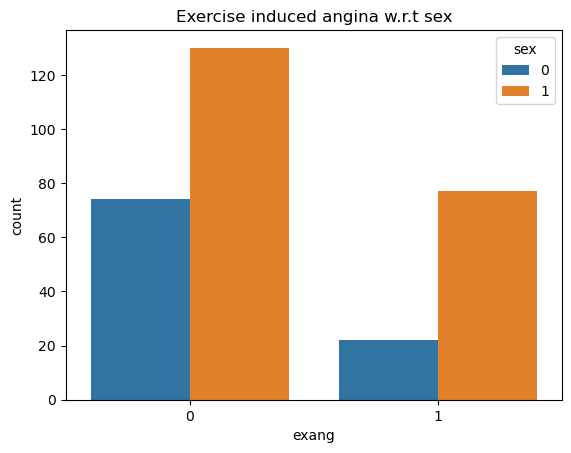

In [28]:
sns.countplot(x='exang', data=df, hue='sex')
plt.title("Exercise induced angina w.r.t sex");

## Feature Selection

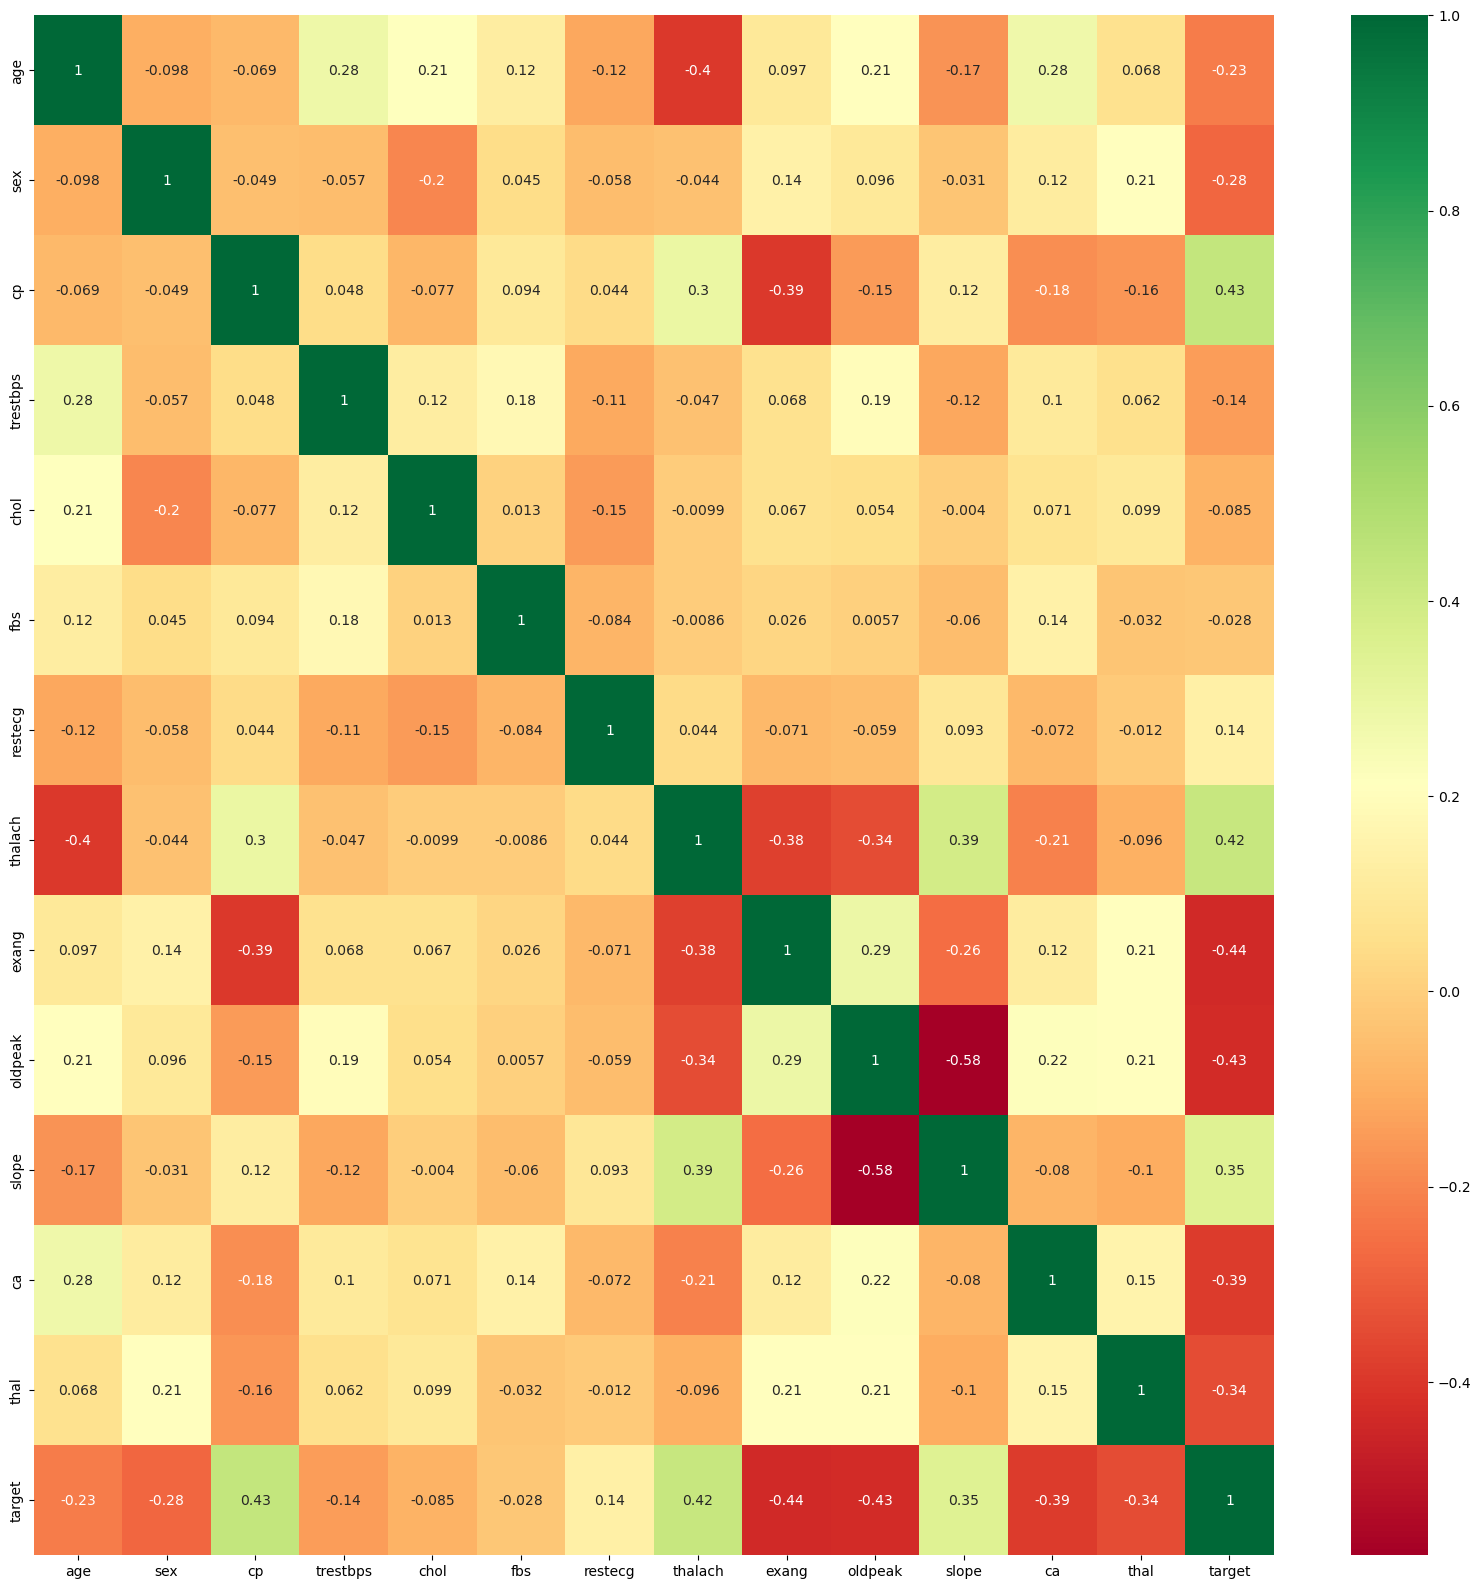

In [29]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

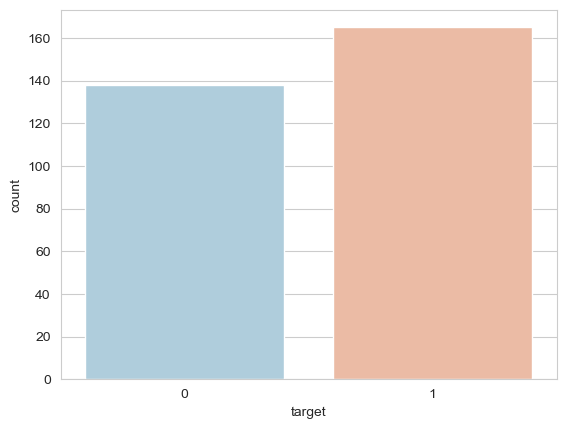

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r');

## Data Processing

In [31]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [33]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [34]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [35]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

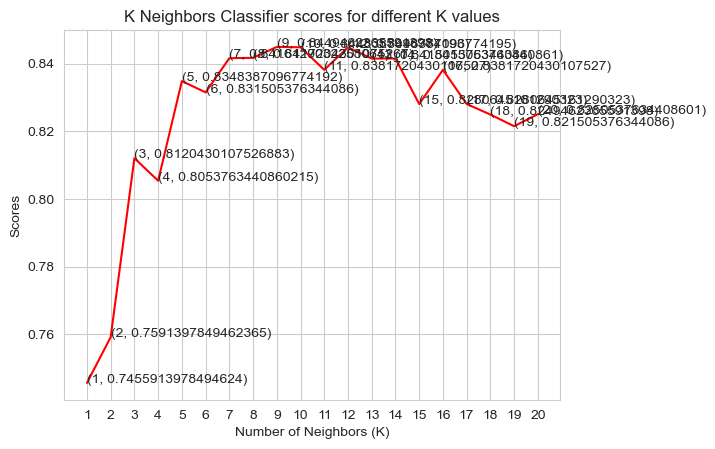

In [36]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values');

In [37]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [38]:
score.mean()

0.8448387096774195

## Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [41]:
score.mean()

0.7949462365591398